In [3]:
import numpy as np

from tqdm import trange
from tqdm import tqdm
# from time import sleep
from IPython.display import Image

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
# Set Seaborn style
# print(plt.style.available)
plt.style.use('seaborn-v0_8-pastel')

In [3]:
run_name = "bincl07_ecc"

In [4]:
N = 5000000
dt = 1. * 10**5
# Cluster radii (difined as 1 [pc] * 10^{-2}) in [km]
R_cl = np.float64(3.086 * 10**(13-2))
# Binary apogee distance (difined as 0.5 [pc] * 10^{-3}) in [km]
R_bin = np.float64(R_cl / 10)
# Cluster mass definition in [M⊙]
m_cl = np.float64(100.)
time_eval = np.linspace(0, N * dt, N + 1, dtype = np.float64)
# Black hole init (mass, position)
eccentricity = 0.8
m1 = 50.
m2 = 100.
central_BH1 = pg.G_body(np.array([[m1]]), np.array([[R_bin/(1 + eccentricity)/(1 + m1/m2), 0., 0.]], dtype = np.float64))
central_BH2 = pg.G_body(np.array([[m2]]), np.array([[-R_bin/(1 + eccentricity)/(1 + m2/m1), 0., 0.]], dtype = np.float64))
# Cluster init (mass of cluster, position, number of bodies)
cluster_1 = pg.G_cluster(m_cl, np.array([[0.,0.,0.]]), 100)
# set cluster masses ditribution
cluster_1.set_mass_uniform_dist()
# set cluster bodies positions ditribution
cluster_1.set_pos_uniform_dist(R_bin * 2, R_cl)

# Add two massive Black hole in center of cluster
cluster_1.add_object(central_BH1)
cluster_1.add_object(central_BH2)
# set velocities for all bodies in cluster
cluster_1.set_vel_delta_dist()
# choose rest system
cluster_1.set_system_rest()

v1, v2 = pg.get_Vel_orb(central_BH1, central_BH2, np.float64(eccentricity))

cluster_1.vel[-2, :] = v1 * np.array([[0., 1., 0.]])
cluster_1.vel[-1, :] = - v2 * np.array([[0., 1., 0.]])


G, softening = cluster_1.get_G(), cluster_1.get_softening()
G, softening

Debug: Orbit parameters is sm_axis = 9.52e+09
Eccetricity = 0.8


(132446351931.33047, 100000000.0)

In [5]:
print("Potential energy for cluster", np.sum(-cluster_1.get_PE(softening)), " Kinetic enegy is ", np.sum(cluster_1.get_KE()))

Potential energy for cluster -101468.11920209849  Kinetic enegy is  11749.714992467554


In [6]:
Cluster_system = G_evolution(cluster_1, time_eval , f"../output/__run_{run_name}/")


Debug: Directory created successfully! (path is ../output/__run_bincl07_ecc/)


In [7]:
Cluster_system.debug_print()

Debug print
My properties is:
positions:  [[-6.20928148e+10 -1.91080338e+11  7.48848370e+09]
 [ 2.30509250e+11 -2.97796504e+10 -1.73695442e+11]
 [ 9.51633947e+10 -8.02128795e+10  1.89273219e+11]
 [-1.63488824e+11 -6.36016640e+10 -1.06521263e+11]
 [-2.06457167e+10 -2.90156474e+11 -4.10933408e+10]
 [-2.40626998e+11  1.75912555e+10 -1.62255394e+11]
 [-1.73582473e+11  1.60457525e+11 -1.39626332e+11]
 [-1.68578664e+10  1.51902549e+11 -1.12724474e+11]
 [ 2.04359518e+11 -1.29657271e+11 -6.57335517e+10]
 [ 2.14999038e+11  1.45156072e+11 -1.30443067e+11]
 [ 8.66378763e+10  3.69278241e+10  1.02024634e+11]
 [ 1.08480309e+11  1.82803197e+11 -1.72395492e+11]
 [ 7.41236613e+10 -1.98350941e+11 -1.94206585e+11]
 [-1.04671331e+11 -2.00114993e+11  1.66826255e+11]
 [-6.07693096e+10 -1.11205923e+11 -1.67240807e+11]
 [-4.06928518e+10  6.96094022e+09 -4.85397752e+10]
 [ 1.73667411e+11 -2.46754483e+10 -5.58622549e+10]
 [-2.66932597e+10 -2.97036348e+11 -5.47185722e+10]
 [-1.45932312e+11 -4.19924618e+10 -1.466

In [8]:
Cluster_system.solve('numbalsoda', 'dop853', 1.e-12, 1.e-12, 10**5)

  0%|          | 0/51 [00:00<?, ?it/s]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_00000yr.h5 successfully


  2%|▏         | 1/51 [00:37<31:05, 37.32s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_01000yr.h5 successfully


  4%|▍         | 2/51 [01:14<30:20, 37.15s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_02000yr.h5 successfully


  6%|▌         | 3/51 [01:53<30:35, 38.23s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_03000yr.h5 successfully


  8%|▊         | 4/51 [02:36<31:26, 40.15s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_04000yr.h5 successfully


 10%|▉         | 5/51 [03:21<31:56, 41.67s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_05000yr.h5 successfully


 12%|█▏        | 6/51 [04:04<31:44, 42.32s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_06000yr.h5 successfully


 14%|█▎        | 7/51 [04:51<32:01, 43.67s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_07000yr.h5 successfully


 16%|█▌        | 8/51 [05:36<31:38, 44.16s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_08000yr.h5 successfully


 18%|█▊        | 9/51 [06:20<30:58, 44.25s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_09000yr.h5 successfully


 20%|█▉        | 10/51 [07:05<30:22, 44.44s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_10000yr.h5 successfully


 22%|██▏       | 11/51 [07:50<29:45, 44.65s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_11000yr.h5 successfully


 24%|██▎       | 12/51 [08:37<29:29, 45.36s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_12000yr.h5 successfully


 25%|██▌       | 13/51 [09:24<28:52, 45.58s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_13000yr.h5 successfully


 27%|██▋       | 14/51 [10:08<27:54, 45.26s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_14000yr.h5 successfully


 29%|██▉       | 15/51 [10:52<26:52, 44.79s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_15000yr.h5 successfully


 31%|███▏      | 16/51 [11:36<26:02, 44.63s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_16000yr.h5 successfully


 33%|███▎      | 17/51 [12:20<25:09, 44.41s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_17000yr.h5 successfully


 35%|███▌      | 18/51 [13:05<24:30, 44.56s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_18000yr.h5 successfully


 37%|███▋      | 19/51 [13:52<24:07, 45.22s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_19000yr.h5 successfully


 39%|███▉      | 20/51 [14:38<23:37, 45.71s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_20000yr.h5 successfully


 41%|████      | 21/51 [15:26<23:10, 46.34s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_21000yr.h5 successfully


 43%|████▎     | 22/51 [16:18<23:14, 48.09s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_22000yr.h5 successfully


 45%|████▌     | 23/51 [17:08<22:40, 48.61s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_23000yr.h5 successfully


 47%|████▋     | 24/51 [17:57<21:53, 48.64s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_24000yr.h5 successfully


 49%|████▉     | 25/51 [18:43<20:46, 47.94s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_25000yr.h5 successfully


 51%|█████     | 26/51 [19:32<20:01, 48.07s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_26000yr.h5 successfully


 53%|█████▎    | 27/51 [20:19<19:07, 47.83s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_27000yr.h5 successfully


 55%|█████▍    | 28/51 [21:06<18:15, 47.63s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_28000yr.h5 successfully


 57%|█████▋    | 29/51 [21:54<17:26, 47.59s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_29000yr.h5 successfully


 59%|█████▉    | 30/51 [22:40<16:33, 47.33s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_30000yr.h5 successfully


 61%|██████    | 31/51 [23:28<15:46, 47.34s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_31000yr.h5 successfully


 63%|██████▎   | 32/51 [24:15<15:00, 47.39s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_32000yr.h5 successfully


 65%|██████▍   | 33/51 [25:04<14:18, 47.72s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_33000yr.h5 successfully


 67%|██████▋   | 34/51 [25:52<13:33, 47.86s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_34000yr.h5 successfully


 69%|██████▊   | 35/51 [26:39<12:43, 47.69s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_35000yr.h5 successfully


 71%|███████   | 36/51 [27:25<11:48, 47.20s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_36000yr.h5 successfully


 73%|███████▎  | 37/51 [28:11<10:53, 46.70s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_37000yr.h5 successfully


 75%|███████▍  | 38/51 [28:58<10:10, 46.94s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_38000yr.h5 successfully


 76%|███████▋  | 39/51 [29:46<09:25, 47.08s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_39000yr.h5 successfully


 78%|███████▊  | 40/51 [30:32<08:36, 46.97s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_40000yr.h5 successfully


 80%|████████  | 41/51 [31:20<07:51, 47.14s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_41000yr.h5 successfully


 82%|████████▏ | 42/51 [32:08<07:06, 47.41s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_42000yr.h5 successfully


 84%|████████▍ | 43/51 [32:56<06:20, 47.52s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_43000yr.h5 successfully


 86%|████████▋ | 44/51 [33:44<05:33, 47.66s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_44000yr.h5 successfully


 88%|████████▊ | 45/51 [34:31<04:45, 47.61s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_45000yr.h5 successfully


 90%|█████████ | 46/51 [35:18<03:56, 47.32s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_46000yr.h5 successfully


 92%|█████████▏| 47/51 [36:06<03:10, 47.73s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_47000yr.h5 successfully


 94%|█████████▍| 48/51 [36:55<02:23, 47.95s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_48000yr.h5 successfully


 96%|█████████▌| 49/51 [37:44<01:36, 48.18s/it]

Debug: Data saved in ../output/__run_bincl07_ecc//gsim_49000yr.h5 successfully


 98%|█████████▊| 50/51 [38:32<00:46, 46.25s/it]

Debug: last file was not created. Too short lenth of simulation's time_array (less than 2). It doesn't affect much on results.


In [56]:
mass_save, usol2_p, usol2_v, time_save3 = get_data_from_dir(path = Cluster_system.get_file()[0], shape_obj = Cluster_system.shape(),  step_size = 100)

Loading: gsim_00000yr.h5
Loading: gsim_01000yr.h5
Loading: gsim_02000yr.h5
Loading: gsim_03000yr.h5
Loading: gsim_04000yr.h5
Loading: gsim_05000yr.h5
Loading: gsim_06000yr.h5
Loading: gsim_07000yr.h5
Loading: gsim_08000yr.h5
Loading: gsim_09000yr.h5
Loading: gsim_10000yr.h5
Loading: gsim_11000yr.h5
Loading: gsim_12000yr.h5
Loading: gsim_13000yr.h5
Loading: gsim_14000yr.h5
Loading: gsim_15000yr.h5
Loading: gsim_16000yr.h5
Loading: gsim_17000yr.h5
Loading: gsim_18000yr.h5
Loading: gsim_19000yr.h5
Loading: gsim_20000yr.h5
Loading: gsim_21000yr.h5
Loading: gsim_22000yr.h5
Loading: gsim_23000yr.h5
Loading: gsim_24000yr.h5
Loading: gsim_25000yr.h5
Loading: gsim_26000yr.h5
Loading: gsim_27000yr.h5
Loading: gsim_28000yr.h5
Loading: gsim_29000yr.h5
Loading: gsim_30000yr.h5
Loading: gsim_31000yr.h5
Loading: gsim_32000yr.h5
Loading: gsim_33000yr.h5
Loading: gsim_34000yr.h5
Loading: gsim_35000yr.h5
Loading: gsim_36000yr.h5
Loading: gsim_37000yr.h5
Loading: gsim_38000yr.h5
Loading: gsim_39000yr.h5


In [57]:
def pos_mass_center(mass : FloatArray, pos_t : FloatArray):
    return np.sum(pos_t * mass, axis = 1) / np.sum(mass)
def Cluster_separation_dist_t(mass : FloatArray, pos_t : FloatArray, time_arr : FloatArray, i_body : int) -> FloatArray:
    return np.sqrt(np.sum((pos_mass_center(mass, pos_t)-pos_t[:, i_body, :])**2, axis = 1))/(3.086*10**13)

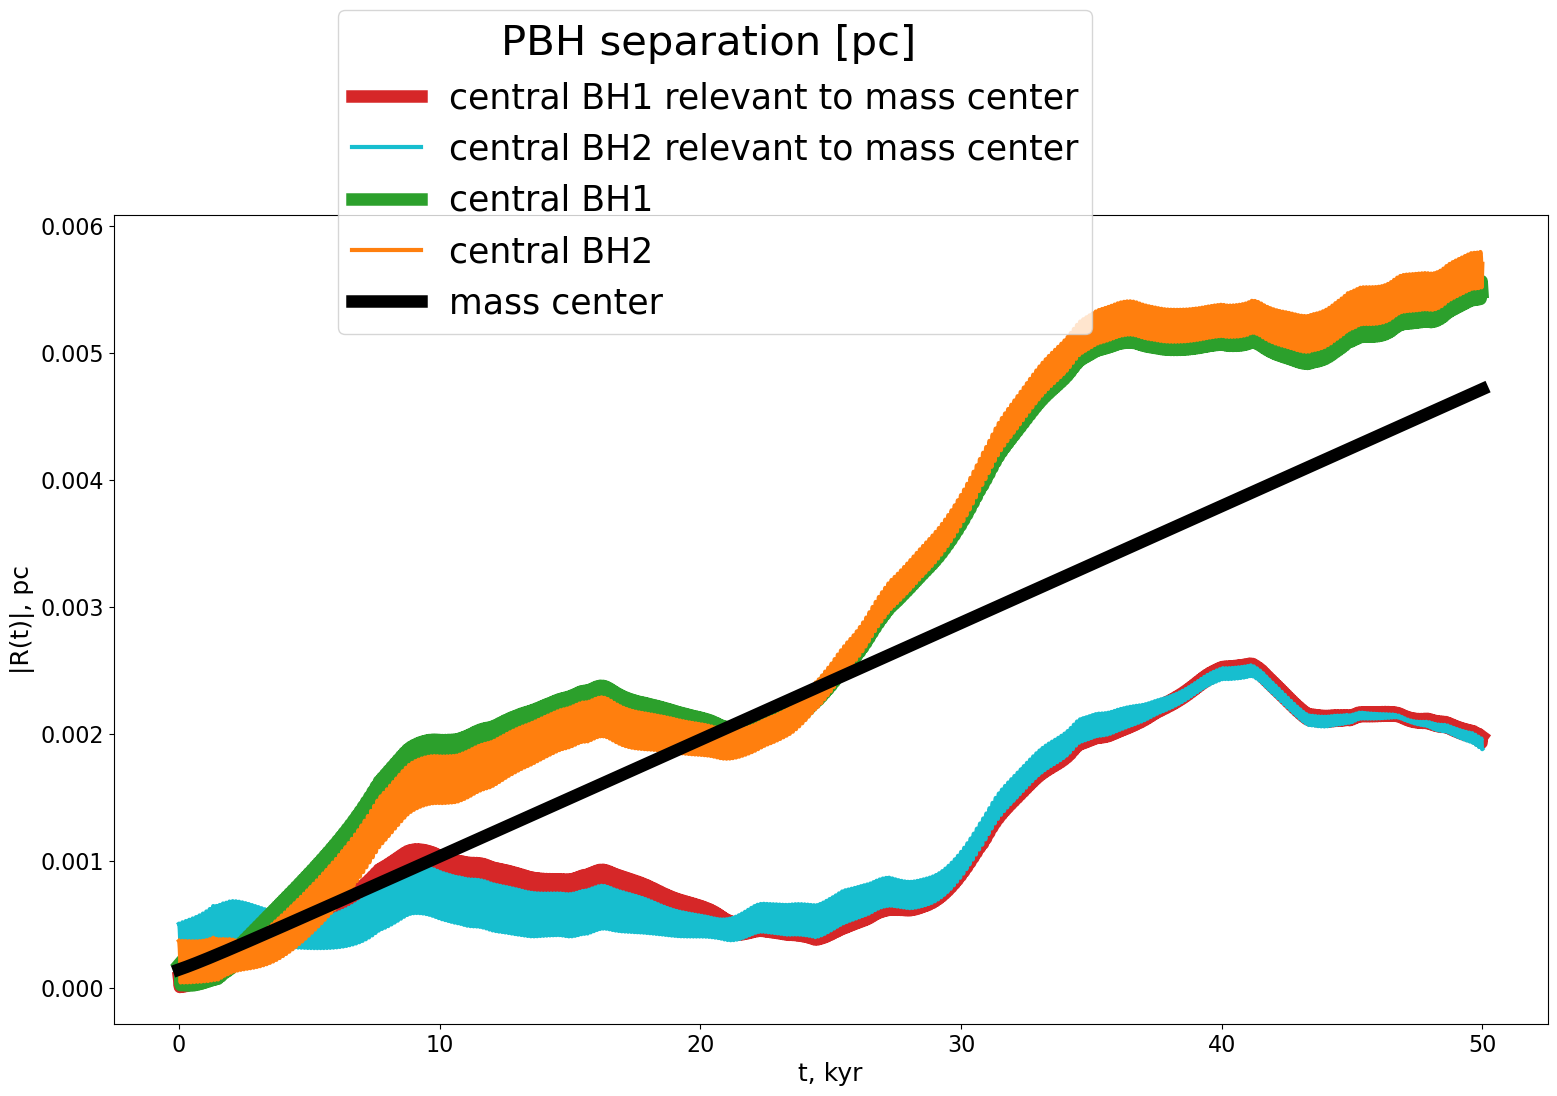

In [58]:
figL, axL = plt.subplots()
axL.plot(time_save3*10**(-10), Cluster_separation_dist_t(mass_save, usol2_p, time_save3, -1), color = "tab:red", linewidth = 9, label = "central BH1 relevant to mass center")
axL.plot(time_save3*10**(-10), Cluster_separation_dist_t(mass_save, usol2_p, time_save3, -2), color = "tab:cyan", linewidth = 3, label = "central BH2 relevant to mass center")
axL.plot(time_save3*10**(-10), np.sqrt(np.sum(usol2_p[:,-1,:]**2, axis = 1))/(3.086*10**13), color = "tab:green", linewidth = 9, label = "central BH1")
axL.plot(time_save3*10**(-10), np.sqrt(np.sum(usol2_p[:,-2,:]**2, axis = 1))/(3.086*10**13), color = "tab:orange", linewidth = 3, label = "central BH2")
axL.plot(time_save3*10**(-10), np.sqrt(np.sum(pos_mass_center(mass_save, usol2_p)**2, axis = 1))/(3.086*10**13), color = "black", linewidth = 9, label = "mass center")

axL.set(xlabel = 't, kyr', ylabel = '|R(t)|, pc')
axL.xaxis.label.set_fontsize(18)
axL.yaxis.label.set_fontsize(18)
axL.tick_params(labelsize = 16)
figL.set_size_inches(18.5, 10.5)
lines = []
labels = []

for axL in figL.axes:
    axLine, axLabel = axL.get_legend_handles_labels()
    lines.extend(axLine)
    
    labels.extend(axLabel)
figL.legend( lines, labels,           
           loc = 'lower center', bbox_to_anchor=( 0.45 , 0.75 ), title = 'PBH separation [pc] ', fontsize = 25, title_fontsize = 30)
           

#размер шрифта увеличить для значений осей
figL = axL.get_figure()
figL.savefig(f'../output/__run_{run_name}/pc_graf_10e9.png')

plt.show()

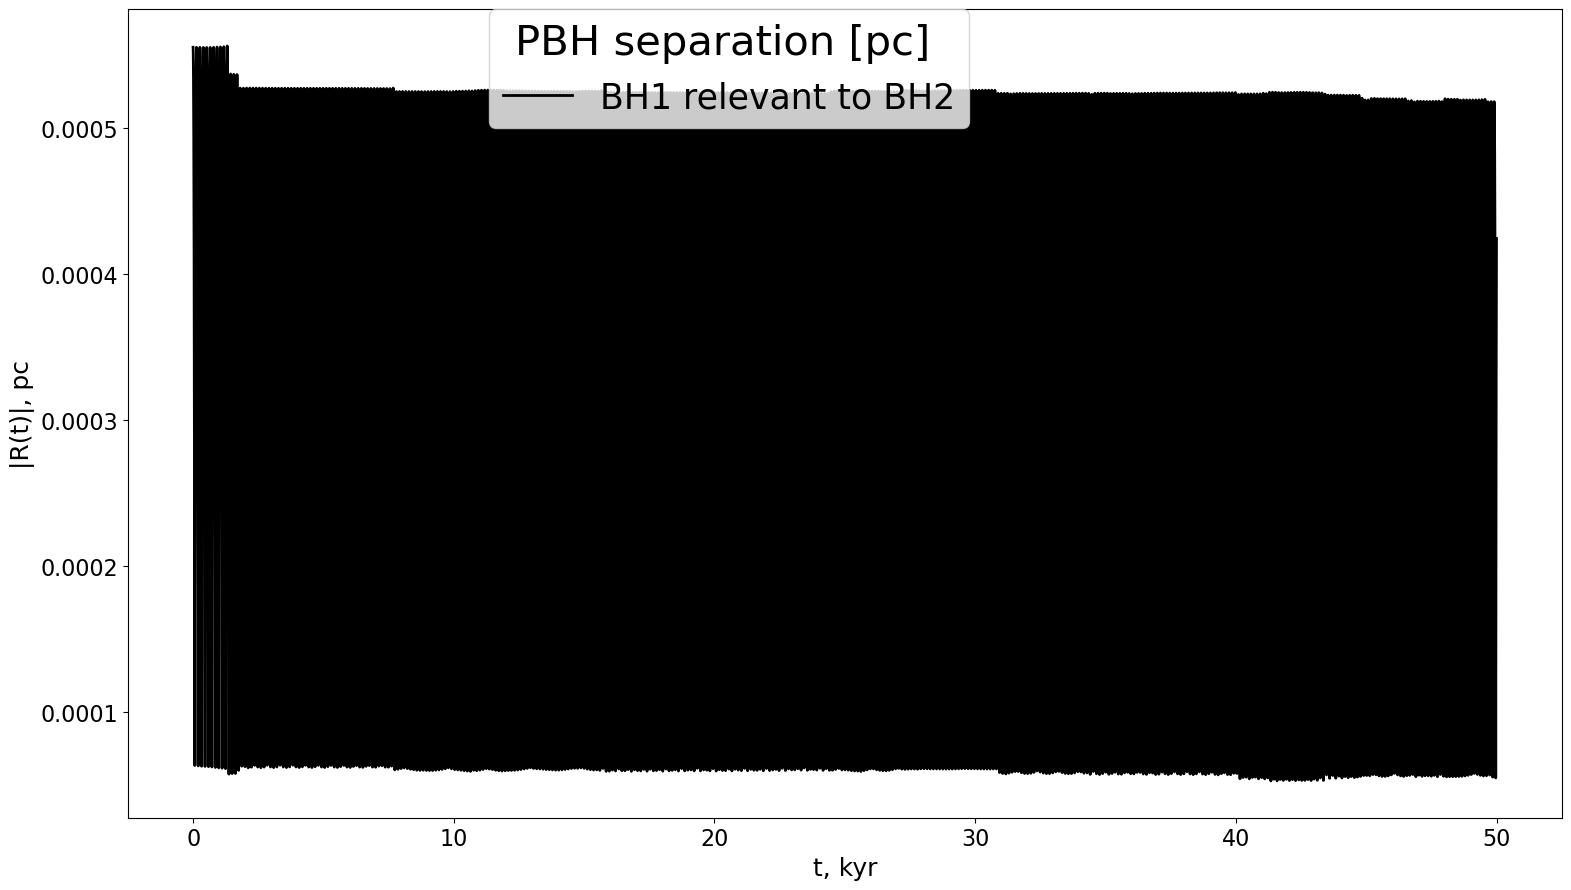

In [59]:
figL, axL = plt.subplots()
axL.plot(time_save3*10**(-10), np.sqrt(np.sum((usol2_p[:,-1,:]-usol2_p[:,-2,:])**2, axis = 1))/(3.086*10**13), color = "black", linewidth = 2, label = "BH1 relevant to BH2")

axL.set(xlabel = 't, kyr', ylabel = '|R(t)|, pc')
axL.xaxis.label.set_fontsize(18)
axL.yaxis.label.set_fontsize(18)
axL.tick_params(labelsize = 16)
figL.set_size_inches(18.5, 10.5)
lines = []
labels = []

for axL in figL.axes:
    axLine, axLabel = axL.get_legend_handles_labels()
    lines.extend(axLine)
    
    labels.extend(axLabel)
figL.legend( lines, labels,           
           loc = 'lower center', bbox_to_anchor=( 0.45 , 0.75 ), title = 'PBH separation [pc] ', fontsize = 25, title_fontsize = 30)
           

#размер шрифта увеличить для значений осей
figL = axL.get_figure()
figL.savefig(f'../output/__run_{run_name}/pc_relevant.png')

plt.show()

In [60]:
from pygra.parallel_acc import getPE_numba
import numba as nb
from numba import njit, prange
@njit(nb.types.Tuple((nb.float64[:, :], nb.float64[:, :]))(
    nb.float64[:], nb.float64[:, :, :], nb.float64[:, :, :], nb.float64, nb.float64), parallel = True)
def get_PEnergy(mass : FloatArray, pos_t : FloatArray, vel_t : FloatArray, __G : np.float64, __softening : np.float64) -> tuple[FloatArray, FloatArray]:
    N, n, k = pos_t.shape
    kinetinc_En : FloatArray =  np.empty((N, n), dtype = np.float64)
    potential_En : FloatArray =  np.empty((N, n), dtype = np.float64)
    for i in prange(N):
        potential_En[i, :] = - getPE_numba(pos_t[i,:,:], mass, __G, __softening)
        kinetinc_En[i, :] = 0.5 * mass * np.sum(vel_t[i, :, :] * vel_t[i, :, :], axis = 1)
    return kinetinc_En, potential_En

KE, PE = get_PEnergy(mass_save.flatten(), usol2_p, usol2_v, G, softening)

 68%|██████▊   | 680/999.0 [28:59<13:36,  2.56s/it]


100%|██████████| 100/100 [00:00<00:00, 152.88it/s]


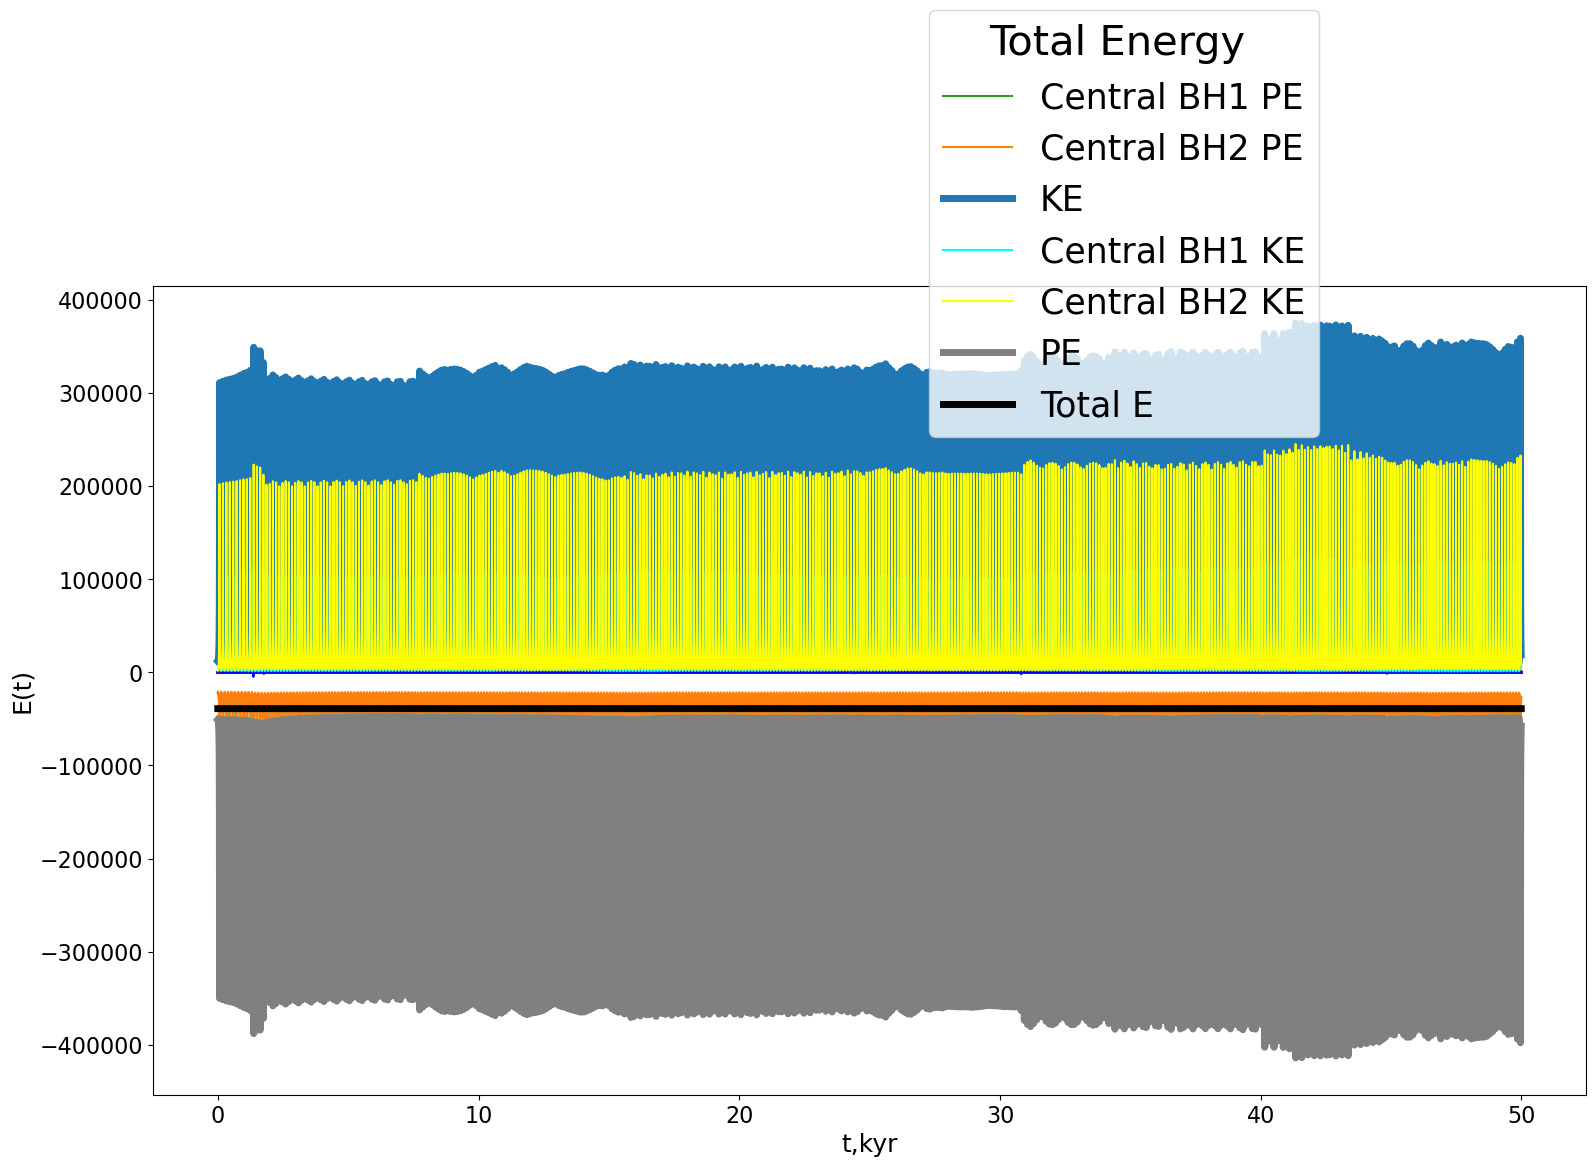

In [61]:
#plt.xlim([0, 1000000*dt])
#x=np.linspace(x_min, x_max, num=500)


figE, axE = plt.subplots()

for ittt in trange(100):
    axE.plot(time_save3*10**(-10), KE[:, ittt], color = "red")#,markevery=100
    axE.plot(time_save3*10**(-10), 0.5 * PE[:, ittt], color = "blue")#,markevery=100

axE.plot(time_save3*10**(-10), 0.5 * PE[:, -1], color = "tab:green", label = 'Central BH1 PE')#,markevery=100
axE.plot(time_save3*10**(-10), 0.5 * PE[:, -2], color = "tab:orange", label = 'Central BH2 PE')#,markevery=100
axE.plot(time_save3*10**(-10), np.sum(KE[:, :], axis = 1), color = "tab:blue", linewidth = 5, label = "KE")#,markevery=100
axE.plot(time_save3*10**(-10), KE[:, -1], color = "cyan", label = 'Central BH1 KE')#,markevery=100
axE.plot(time_save3*10**(-10), KE[:, -2], color = "yellow", label = 'Central BH2 KE')#,markevery=100
axE.plot(time_save3*10**(-10), 0.5 * np.sum(PE[:, :], axis = 1), color = "gray", linewidth = 5, label = "PE")
axE.plot(time_save3*10**(-10), np.sum(KE[:, :] + 0.5 * PE[:, :], axis = 1), color = "black", linewidth = 5, label = "Total E")

axE.set(xlabel='t,kyr', ylabel='E(t)')
axE.xaxis.label.set_fontsize(18)
axE.yaxis.label.set_fontsize(18)
axE.tick_params(labelsize=16)
#axL.grid(True)
#ax3.set_ylim(1, 3);
figE.set_size_inches(18.5, 10.5)
lines = []
labels = []

for axE in figE.axes:
    axLine, axLabel = axE.get_legend_handles_labels()
    lines.extend(axLine)
    
    labels.extend(axLabel)
figE.legend( lines, labels,           
           loc = 'lower center', bbox_to_anchor=( 0.65 , 0.72 ), title = 'Total Energy ', fontsize = 25, title_fontsize = 30)
           

figE = axE.get_figure()
figE.savefig(f'../output/__run_{run_name}/E_graf.png')

plt.show()

In [62]:
#plt.xlim([0, 1000000*dt])
#x=np.linspace(x_min, x_max, num=500)


figE, axE = plt.subplots()

# for ittt in trange(100):
#     axE.plot(time_save3*10**(-10), KE[:, ittt], color = "red")#,markevery=100
#     axE.plot(time_save3*10**(-10), 0.5 * PE[:, ittt], color = "blue")#,markevery=100

# axE.plot(time_save3*10**(-10), 0.5 * PE[:, -1], color = "tab:green", label = 'Central BH PE')#,markevery=100
# axE.plot(time_save3*10**(-10), np.sum(KE[:, :], axis = 1), color = "tab:blue", linewidth = 5, label = "KE")#,markevery=100
# axE.plot(time_save3*10**(-10), KE[:, -1], color = "cyan", label = 'Central BH KE')#,markevery=100
# axE.plot(time_save3*10**(-10), 0.5 * np.sum(PE[:, :], axis = 1), color = "gray", linewidth = 5, label = "PE")
axE.plot(time_save3*10**(-10), np.sum(KE[:, :] + 0.5 * PE[:, :], axis = 1), color = "black", linewidth = 5, label = "Total E")

axE.set(xlabel='t,kyr', ylabel='E(t)')
axE.xaxis.label.set_fontsize(18)
axE.yaxis.label.set_fontsize(18)
axE.tick_params(labelsize=16)
#axL.grid(True)
#ax3.set_ylim(1, 3);
figE.set_size_inches(18.5, 10.5)
lines = []
labels = []

for axE in figE.axes:
    axLine, axLabel = axE.get_legend_handles_labels()
    lines.extend(axLine)
    
    labels.extend(axLabel)
figE.legend( lines, labels,           
           loc = 'lower center', bbox_to_anchor=( 0.65 , 0.72 ), title = 'Total Energy ', fontsize = 25, title_fontsize = 30)
           

figE = axE.get_figure()
figE.savefig(f'../output/__run_{run_name}/E_TOT_graf.png')

plt.show()

In [64]:
# scale - is a scale for plot
# N_T=N_T/dN_T - is number of steps per dN_t - step len for pos save
# dN_T2 - step for plot's impages saving
def print_gif(pos_save, scale, N_T, dN_T2 = 100, run_name = "0"): #N_T=N_T/dN_T
    for i in range(100):
        name = "../output/__run_"+run_name+"/Pic_t"
        try:
            os.makedirs(name)
            print("Directory created successfully! (path is " + name + ")")
            break
        except OSError as error:
            name = "../output/__run_" + str(i) + "/"
            if i == 99: print(f"Directory creation failed: {error}")
    figFF, ax1 = plt.subplots()
    ax1.grid(True)
    ax1.legend(prop = {'size': 15})
    ax1.set(title = '$Animation$', xlabel = '$x$', ylabel = '$y$')
    ax1.set_ylim(-scale, scale)
    ax1.set_xlim(-scale, scale)
    plt.ioff()
    pbar = tqdm(total = N_T/dN_T2)
    line = ax1.scatter(pos_save[:, :-2, 0], pos_save[:, :-2, 1], s = 10, color = 'tab:blue')
    line2 = ax1.scatter(pos_save[:, -1, 0], pos_save[:, -1, 1], s = 10, color = 'tab:red')
    line3 = ax1.scatter(pos_save[:, -2, 0], pos_save[:, -2, 1], s = 10, color = 'tab:green')

    for i in range(0, int(N_T), dN_T2):
        line.set_offsets(np.vstack((pos_save[i+1, :-2, 0], pos_save[i+1, :-2, 1])).T)
        line2.set_offsets(np.vstack((pos_save[i+1, -1, 0], pos_save[i+1, -1, 1])).T)
        line3.set_offsets(np.vstack((pos_save[i+1, -2, 0], pos_save[i+1, -2, 1])).T)
        figFF = ax1.get_figure()
        figFF.savefig(f'../output/__run_{run_name}/Pic_t/saved_figure_' + str(i) + '.png')
        plt.close(figFF)
        plt.clf()
        pbar.update(1)
    pbar.close()    

    # Images list init
    frames = []
    from PIL import Image
    for frame_number in trange(0, int(N_T), dN_T2):
        # Open image for each moment
        frame = Image.open(f'../output/__run_{run_name}/Pic_t/saved_figure_{frame_number}.png')
        # add image to list of images.
        frames.append(frame)
        
    # Save all images with the first one
    frames[0].save(
        f'../output/__run_{run_name}/homer2.gif',
        save_all = True,
        append_images = frames[1:],  # Ignore first image
        optimize = True,
        duration = 1,
        loop = 0
    )
print_gif(usol2_p, 1.5 * R_cl, (time_save3.shape[0]-10), 1000, run_name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Directory created successfully! (path is ../output/__run_bincl07_ecc/Pic_t)


/opt/conda/lib/python3.10/site-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 50/49.99 [00:03<00:00, 13.84it/s]
100%|██████████| 50/50 [00:00<00:00, 619.77it/s]


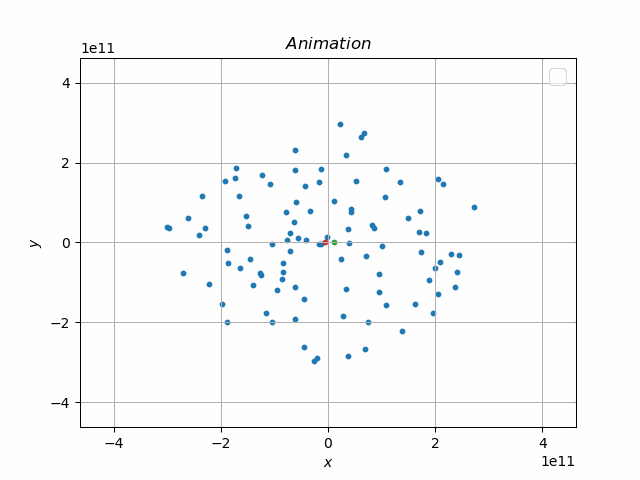

In [65]:
from IPython.display import Image
Image(f'../output/__run_{run_name}/homer2.gif')

In [66]:
# scale - is a scale for plot
# N_T=N_T/dN_T - is number of steps per dN_t - step len for pos save
# dN_T2 - step for plot's impages saving
def print_gif(pos_save, scale, N_T, dN_T2 = 100, run_name = "0"): #N_T=N_T/dN_T
    for i in range(100):
        name = "../output/__run_"+run_name+"/Pic_t"
        try:
            os.makedirs(name)
            print("Directory created successfully! (path is " + name + ")")
            break
        except OSError as error:
            name = "../output/__run_" + str(i) + "/"
            if i == 99: print(f"Directory creation failed: {error}")
    figFF, ax1 = plt.subplots()
    ax1.grid(True)
    ax1.legend(prop = {'size': 15})
    ax1.set(title = '$Animation$', xlabel = '$x$', ylabel = '$y$')
    ax1.set_ylim(-scale, scale)
    ax1.set_xlim(-scale, scale)
    plt.ioff()
    pbar = tqdm(total = N_T/dN_T2)
    line3 = ax1.scatter(pos_save[:, -2, 0] - pos_save[:, -1, 0], pos_save[:, -2, 1] - pos_save[:, -1, 1], s = 10, color = 'black')

    for i in range(0, int(N_T), dN_T2):
        line3.set_offsets(np.vstack((pos_save[i+1, -2, 0] - pos_save[i+1, -1, 0], pos_save[i+1, -2, 1] - pos_save[i+1, -1, 1])).T)
        figFF = ax1.get_figure()
        figFF.savefig(f'../output/__run_{run_name}/Pic_t/saved_figure_' + str(i) + '.png')
        plt.close(figFF)
        plt.clf()
        pbar.update(1)
    pbar.close()    

    # Images list init
    frames = []
    from PIL import Image
    for frame_number in trange(0, int(N_T), dN_T2):
        # Open image for each moment
        frame = Image.open(f'../output/__run_{run_name}/Pic_t/saved_figure_{frame_number}.png')
        # add image to list of images.
        frames.append(frame)
        
    # Save all images with the first one
    frames[0].save(
        f'../output/__run_{run_name}/homer3.gif',
        save_all = True,
        append_images = frames[1:],  # Ignore first image
        optimize = True,
        duration = 1,
        loop = 0
    )
print_gif(usol2_p, 2 * R_bin, time_save3.shape[0]-10, 1000, run_name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Directory creation failed: [Errno 17] File exists: '../output/__run_bincl07_ecc/Pic_t'


100%|██████████| 50/49.99 [00:02<00:00, 17.72it/s]
100%|██████████| 50/50 [00:00<00:00, 1201.66it/s]


In [67]:
from IPython.display import Image
Image(f'../output/__run_{run_name}/homer3.gif')

In [68]:
# scale - is a scale for plot
# N_T=N_T/dN_T - is number of steps per dN_t - step len for pos save
# dN_T2 - step for plot's impages saving
def print_gif(pos_save, scale, N_T, dN_T2 = 100, run_name="0"): #N_T=N_T/dN_T
    for i in range(100):
        name = "../output/__run_"+run_name+"/Pic_t"
        try:
            os.makedirs(name)
            print("Directory created successfully! (path is " + name + ")")
            break
        except OSError as error:
            name = "../output/__run_" + str(i) + "/"
            if i == 99: print(f"Directory creation failed: {error}")
    figFF, ax1 = plt.subplots()
    ax1.grid(True)
    ax1.legend(prop = {'size': 15})
    ax1.set(title = '$Animation$', xlabel = '$x$', ylabel = '$y$')
    ax1.set_ylim(-scale, scale)
    ax1.set_xlim(-scale, scale)
    plt.ioff()
    pbar = tqdm(total = N_T/dN_T2)
    #line = ax1.scatter(pos_save[:-2,0,0],pos_save[:-2,1,0],s=5,color='tab:blue')
    line = ax1.scatter(pos_save[0, -2, 0] - pos_save[0, -1, 0], pos_save[0, -2, 1] - pos_save[0, -1, 1], s = 10, color = 'tab:green', label = 'start')
    iti=1
    line2 = ax1.plot(pos_save[::iti, -2, 0] - pos_save[::iti, -1, 0], pos_save[::iti, -2, 1] - pos_save[::iti, -1, 1], linewidth = 1, color = 'tab:red')
    line3 = ax1.scatter(pos_save[-1, -2, 0] - pos_save[-1, -1, 0], pos_save[-1, -2, 1] - pos_save[-1, -1, 1], s = 20, color = 'black', label = 'end')
    figFF = ax1.get_figure()
    figFF.savefig(f'../output/__run_{run_name}/bin_evol.png')
print_gif(usol2_p, 1.3* R_bin, N, 100, run_name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Directory creation failed: [Errno 17] File exists: '../output/__run_bincl07_ecc/Pic_t'


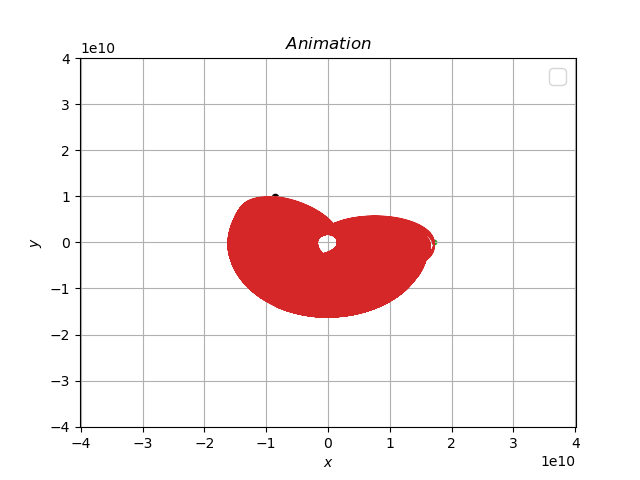

In [69]:
from IPython.display import Image
Image(f'../output/__run_{run_name}/bin_evol.png')